In [1]:
from lang_main import io
from lang_main.analysis.graphs import rescale_edge_weights, get_graph_metadata

from pathlib import Path
import pickle
import base64
import os
from logging import NullHandler

import numpy as np

import py4cytoscape as p4c
import py4cytoscape.py4cytoscape_logger_settings as p4c_logging
p4c.set_summary_logger(False)
#p4c_logging._SUMMARY_LOG_LEVEL = 'ERROR'
# p4c_logging._DETAIL_LOG_LEVEL = 'ERROR'
p4c.py4cytoscape_logger.detail_logger.setLevel('ERROR')
p4c.py4cytoscape_logger.detail_logger.removeHandler(p4c.py4cytoscape_logger.detail_handler)
p4c.py4cytoscape_logger.detail_logger.addHandler(NullHandler())

2024-07-10 11:42:23 +0000 | io:INFO | Loaded TOML config file successfully.


A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytre

In [2]:
res_path = Path(r'A:\Arbeitsaufgaben\lang-main\scripts\results\test_20240619')
assert res_path.exists()

In [3]:
#obj = 'TK-GRAPH_POSTPROCESSING.pkl'
obj = 'TK-GRAPH_ANALYSIS.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [5]:
ret = io.load_pickle(load_pth)

2024-07-10 11:01:10 +0000 | io:INFO | Loaded file successfully.


In [6]:
tkg = ret[0]

In [7]:
tkg

TokenGraph(name: TokenGraph, number of nodes: 158, number of edges: 192)

In [19]:
tkg.rescaled_weights = False

In [20]:
tkg.nodes['Wartungstätigkeit']

{}

In [21]:
obj = 'TK-GRAPH_POSTPROCESSING.pkl'
# obj = 'TK-GRAPH_ANALYSIS.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [22]:
ret = io.load_pickle(load_pth)

2024-07-10 08:16:41 +0000 | io:INFO | Loaded file successfully.


In [23]:
tkg = ret[0]

In [24]:
tkg

TokenGraph(name: TokenGraph, number of nodes: 6028, number of edges: 17950)

In [25]:
tkg.rescaled_weights = False

In [26]:
directed, undirected = tkg.rescale_edge_weights()

In [28]:
directed.metadata_directed

{'num_nodes': 6028,
 'num_edges': 17950,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 382321,
 'edge_memory': 1005200,
 'total_memory': 1387521}

In [29]:
directed.metadata_undirected

{'num_nodes': 6028,
 'num_edges': 17554,
 'min_edge_weight': 0.09520000219345093,
 'max_edge_weight': 1.7527999877929688,
 'node_memory': 382321,
 'edge_memory': 983024,
 'total_memory': 1365345}

In [30]:
get_graph_metadata(undirected)

{'num_nodes': 6028,
 'num_edges': 17554,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 382321,
 'edge_memory': 983024,
 'total_memory': 1365345}

In [12]:
Gtest = rescale_edge_weights(tkg)

break_early = False
i = 0
for idx, (node1, node2) in enumerate(list(Gtest.edges)):
    if break_early and i == 10:
        break
    Gtest[node1][node2]['weight'] = adjusted_weights[idx]
    
    i += 1

In [13]:
break_early = True
i = 0
for n1, n2, w in Gtest.edges.data('weight'):
    if break_early and i == 10:
        break
    print(n1, n2, w)

    i += 1

Wartungstätigkeit Vorgabe 1.0
Wartungstätigkeit Maschinenhersteller 1.0
Wartungstätigkeit Maschinenbediener 0.8215
Wartungstätigkeit Laserabteilung 0.8215
Wartungstätigkeit Arbeitsplan 0.8219
Wartungstätigkeit abarbeiten 0.8215
Wartungstätigkeit Webmaschinenkontrollliste 0.2534
Wartungstätigkeit sehen 0.2534
Vorgabe Maschinenhersteller 1.0
Vorgabe Wartungsplan 0.9181


In [14]:
Gtest.to_undirected(inplace=True)

AttributeError: 'TokenGraph' object has no attribute 'rescaled_weights'

In [15]:
break_early = True
i = 0
for n1, n2, w in Gtest.undirected.edges.data('weight'):
    if break_early and i == 10:
        break
    print(n1, n2, w)

    i += 1

Wartungstätigkeit Vorgabe 1.0
Wartungstätigkeit Maschinenhersteller 1.0
Wartungstätigkeit sehen 0.2533999979496002
Wartungstätigkeit Maschinenbediener 0.8215000033378601
Wartungstätigkeit Laserabteilung 0.8215000033378601
Wartungstätigkeit Arbeitsplan 0.8219000101089478
Wartungstätigkeit abarbeiten 0.8215000033378601
Wartungstätigkeit Webmaschinenkontrollliste 0.2533999979496002
Vorgabe Maschinenhersteller 1.0
Vorgabe Wartungsplan 0.9180999994277954


In [16]:
Gtest.metadata_undirected

{'num_nodes': 6028,
 'num_edges': 17554,
 'min_edge_weight': 0.09520000219345093,
 'max_edge_weight': 1.7527999877929688,
 'node_memory': 382321,
 'edge_memory': 983024,
 'total_memory': 1365345}

In [23]:
'weight' not in Gtest['Wartungstätigkeit']['Vorgabe']

False

In [17]:
Gtest.metadata_directed

{'num_nodes': 6028,
 'num_edges': 17950,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 382321,
 'edge_memory': 1005200,
 'total_memory': 1387521}

In [21]:
c_comps = nx.connected_components(Gtest.undirected)

In [22]:
for comp in c_comps:
    print(len(comp))

5714
2
2
2
3
4
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
2
2
2
2
3
3
4
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
3
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
4
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
3
2
2
2
2
2
2
3
2
2
2
4
2
2
2
3
2
2
2
2
2
2
2
3
2
2
4
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
2
2


---

# Load re-scaled Token Graph

In [3]:
#obj = 'TK-GRAPH_POSTPROCESSING.pkl'
obj = 'TK-GRAPH_ANALYSIS_RESCALED.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [4]:
ret = io.load_pickle(load_pth)

2024-07-10 11:42:39 +0000 | io:INFO | Loaded file successfully.


In [5]:
tk_resc = ret[1]

In [6]:
get_graph_metadata(tk_resc)

{'num_nodes': 158,
 'num_edges': 189,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 9908,
 'edge_memory': 10584,
 'total_memory': 20492}

In [7]:
#import py4cytoscape as p4c
p4c.cytoscape_ping()

You are connected to Cytoscape!


'You are connected to Cytoscape!'

In [16]:
p4c.create_network_from_networkx(tk_resc, title='test', collection='lang_main')

Applying default style...
Applying preferred layout


17998

In [17]:
p4c.get_layout_name_mapping()

{'Attribute Grid Layout': 'attribute-grid',
 'Degree Sorted Circle Layout': 'degree-circle',
 'Group Attributes Layout': 'attributes-layout',
 'Edge-weighted Spring Embedded Layout': 'kamada-kawai',
 'Prefuse Force Directed Layout': 'force-directed',
 'Compound Spring Embedder (CoSE)': 'cose',
 'Hierarchical Layout': 'hierarchical',
 'Attribute Circle Layout': 'attribute-circle',
 'Stacked Node Layout': 'stacked-node-layout',
 'Circular Layout': 'circular',
 'Grid Layout': 'grid',
 'Edge-weighted Force directed (BioLayout)': 'fruchterman-rheingold',
 'Inverted Self-Organizing Map Layout': 'isom',
 'Prefuse Force Directed OpenCL Layout': 'force-directed-cl'}

In [18]:
p4c.get_layout_property_names('force-directed')

['numIterations',
 'defaultSpringCoefficient',
 'defaultSpringLength',
 'defaultNodeMass',
 'isDeterministic',
 'singlePartition']

In [19]:
layout_props = {
    'numIterations': 1000,
     'defaultSpringCoefficient': 1e-4,
     'defaultSpringLength': 45,
     'defaultNodeMass': 12,
     'isDeterministic': True,
     'singlePartition': False,
}

In [20]:
p4c.set_layout_properties('force-directed', layout_props)

''

In [31]:
p4c.get_layout_property_type('kamada-kawai', 'randomize')

'boolean'

In [21]:
p4c.layout_network('force-directed', 'test')

{}

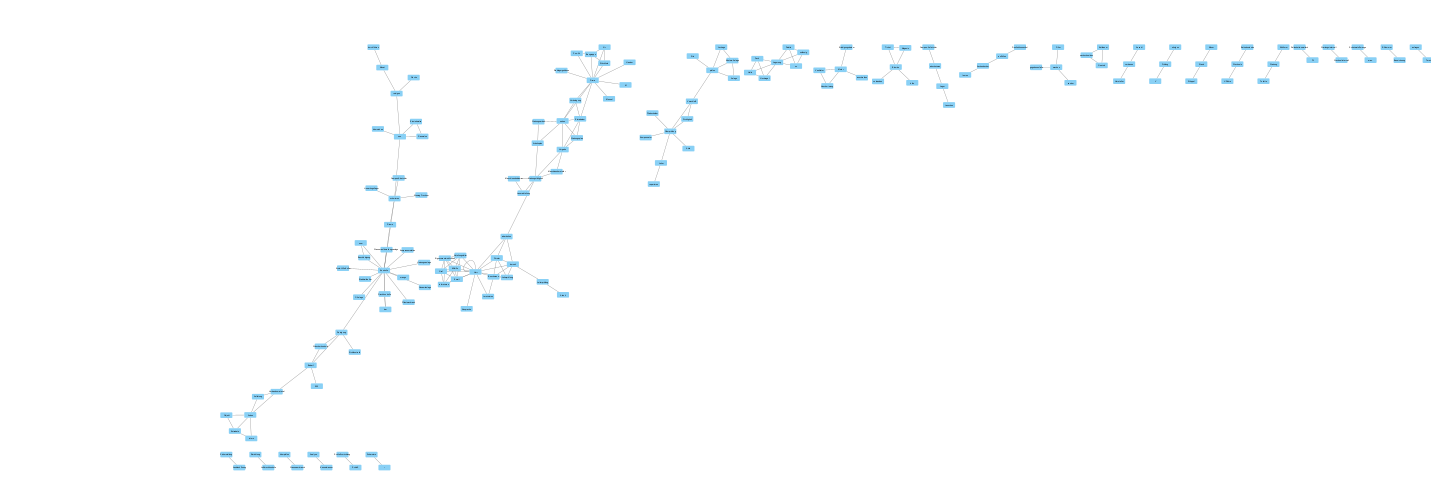

In [22]:
p4c.notebook_export_show_image()

---

# Py4Cytoscape

In [11]:
import py4cytoscape as p4c
dir(p4c)
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | Calling cytoscape_ping()
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀCalling cytoscape_version_info(base_url='http://127.0.0.1:1234/v1')
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀCalling cyrest_get('version', base_url='http://127.0.0.1:1234/v1')
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀHTTP GET(http://127.0.0.1:1234/v1/version)
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀOK[200], content: {"apiVersion":"v1","cytoscapeVersion":"3.10.2"}
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀReturning 'cyrest_get': {'apiVersion': 'v1', 'cytoscapeVersion': '3.10.2'}
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀReturning 'cytoscape_version_info': {'apiVersion': 'v1', 'cytoscapeVersion': '3.10.2', 'automationAPIVersion': '1.9.0', 'py4cytoscapeVersion': '1.9.0'}
You are connected to Cytoscape!
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | Returning 'cyt

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [5]:
import pandas as pd
nodes = pd.DataFrame(data={'id': ["node 0","node 1","node 2","node 3"], 'group': ["A","A","B","B"], 'score': [20,10,15,5]})
edges = pd.DataFrame(data={'source': ["node 0","node 0","node 0","node 2"], 'target': ["node 1","node 2","node 3","node 3"], 'interaction': ["inhibits","interacts","activates","interacts"], 'weight': [5.1,3.0,5.2,9.9]})

In [6]:
nodes

id group  score
0  node 0     A     20
1  node 1     A     10
2  node 2     B     15
3  node 3     B      5

In [7]:
edges

source  target interaction  weight
0  node 0  node 1    inhibits     5.1
1  node 0  node 2   interacts     3.0
2  node 0  node 3   activates     5.2
3  node 2  node 3   interacts     9.9

In [8]:
p4c.create_network_from_data_frames(nodes, edges, title="my first network", collection="DataFrame Example")

Applying default style...
Applying preferred layout


128

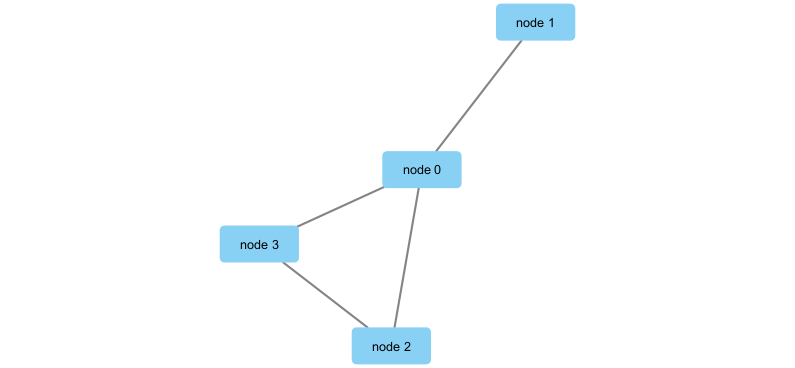

In [10]:
p4c.notebook_export_show_image()

In [11]:
p4c.set_visual_style('Marquee')

{'message': 'Visual Style applied.'}

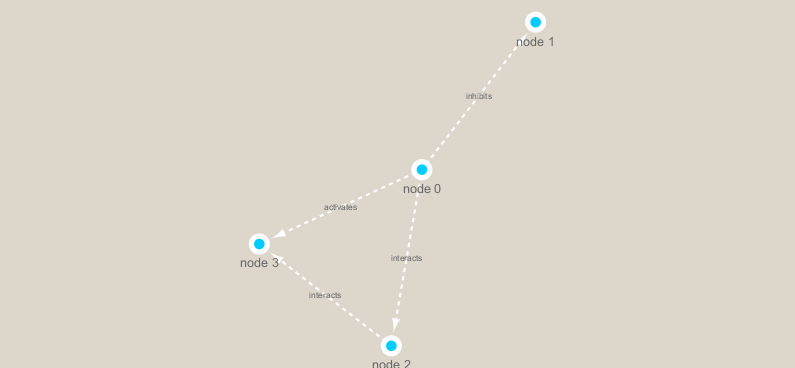

In [13]:
p4c.notebook_export_show_image()

In [14]:
style_name = "myStyle"
defaults = {'NODE_SHAPE': "diamond", 'NODE_SIZE': 30, 'EDGE_TRANSPARENCY': 120, 'NODE_LABEL_POSITION': "W,E,c,0.00,0.00"}
nodeLabels = p4c.map_visual_property('node label', 'id', 'p') #'p' means 'passthrough' mapping
edgeWidth = p4c.map_visual_property('edge width', 'weight', 'p') #'p' means 'passthrough' mapping
p4c.create_visual_style(style_name, defaults, [nodeLabels, edgeWidth])
p4c.set_visual_style(style_name)

{'message': 'Visual Style applied.'}

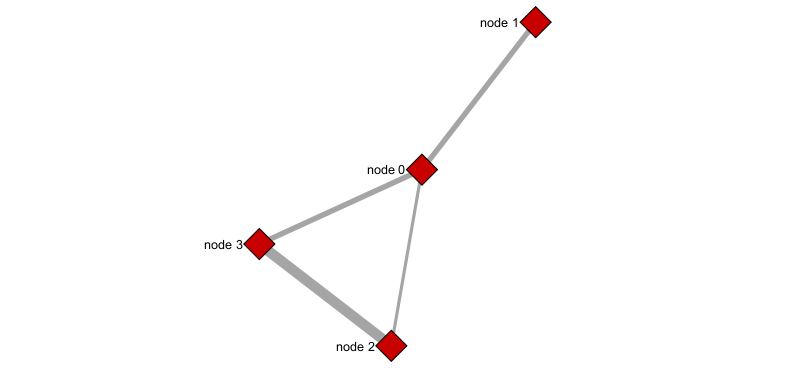

In [15]:
p4c.notebook_export_show_image()

In [20]:
nodes = pd.DataFrame(data={'id': ["A", "B", "C", "D"]})
edges = pd.DataFrame(data={'source': ["C", "B", "B", "B"], 'target': ["D", "A", "D", "C"]})

p4c.create_network_from_data_frames(nodes, edges, title="simple network", collection="Biological Example")

Applying default style...
Applying preferred layout


397

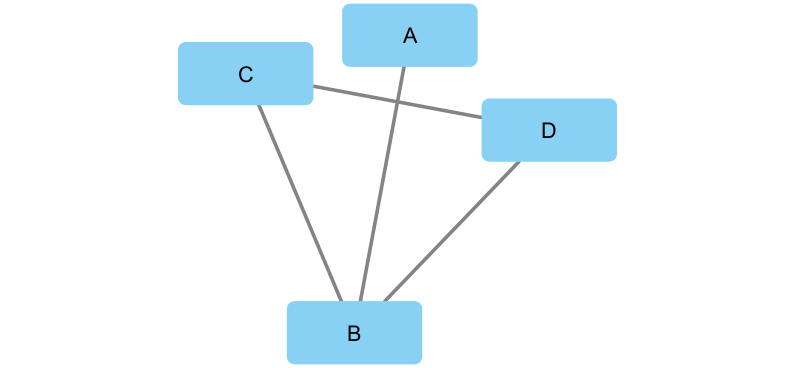

In [21]:
p4c.notebook_export_show_image()

In [22]:
p4c.get_table_columns()

SUID shared name id name  selected
427   427           A  A    A     False
430   430           B  B    B     False
433   433           C  C    C     False
436   436           D  D    D     False

In [23]:
p4c.get_table_column_names()

['SUID', 'shared name', 'id', 'name', 'selected']

In [25]:
p4c.get_layout_name_mapping()

{'Attribute Circle Layout': 'attribute-circle',
 'Stacked Node Layout': 'stacked-node-layout',
 'Attribute Grid Layout': 'attribute-grid',
 'Degree Sorted Circle Layout': 'degree-circle',
 'Circular Layout': 'circular',
 'Group Attributes Layout': 'attributes-layout',
 'Edge-weighted Spring Embedded Layout': 'kamada-kawai',
 'Prefuse Force Directed Layout': 'force-directed',
 'Compound Spring Embedder (CoSE)': 'cose',
 'Grid Layout': 'grid',
 'Hierarchical Layout': 'hierarchical',
 'Edge-weighted Force directed (BioLayout)': 'fruchterman-rheingold',
 'Inverted Self-Organizing Map Layout': 'isom',
 'Prefuse Force Directed OpenCL Layout': 'force-directed-cl'}

In [29]:
p4c.get_layout_property_names('kamada-kawai')

['m_averageIterationsPerNode',
 'm_nodeDistanceStrengthConstant',
 'm_nodeDistanceRestLengthConstant',
 'm_disconnectedNodeDistanceSpringStrength',
 'm_disconnectedNodeDistanceSpringRestLength',
 'm_anticollisionSpringStrength',
 'm_layoutPass',
 'singlePartition',
 'unweighted',
 'randomize']

In [31]:
p4c.get_layout_property_type('kamada-kawai', 'randomize')

'boolean'

In [32]:
p4c.get_layout_property_value('kamada-kawai', 'randomize')

True

In [34]:
from pathlib import Path

In [39]:
tp = Path.cwd()
file = tp / 'test.svg'

In [38]:
p4c.export_visual_styles(str(tp))

{'file': 'A:\\Arbeitsaufgaben\\lang-main\\test-notebooks.xml'}

In [40]:
p4c.export_image(str(file), type='SVG')

{'file': 'A:\\Arbeitsaufgaben\\lang-main\\test-notebooks\\test.svg'}